# Exploratory Data Analysis (EDA) in Python

<img src="film.gif">

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
Films/Movies reveal what viewers around the world find entertaining and what countries play huge roles in producing/making the movies. This EDA explores the development of the film industry throughout the years from its early stage to its Golden Age in Holywood and in today's New Milleninum. 

The dataset used in this EDA can be found on Kaggle <a href="https://www.kaggle.com/stefanoleone992/filmtv-movies-dataset">FilmTV movies dataset</a>.
<pre>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 

%matplotlib inline
sns.set_style("whitegrid")

In [133]:
# read csv file
filepath = os.path.join(os.getcwd(), 'filmtv_movies_eng.csv')
film_df = pd.read_csv(filepath)

### Check gist info about the data frame

In [134]:
# check gist of dataframe 
film_df

,filmtv_id,title,year,genre,duration,country,director,actors,avg_vote,votes,description,notes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982.0,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,31,"With two protruding incisors, a little crafty ...","These are many small independent stories, whic..."
1,3,18 anni tra una settimana,1991.0,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3,"Samantha, not yet eighteen, abandons the comfo...","Luigi Perelli, the director of ""Piovra"", occas..."
2,17,Ride a Wild Pony,1976.0,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.5,10,In the Australia of the pioneers a boy and a g...,"""Ecological"" fable with a happy ending not wit..."
3,18,Diner,1982.0,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.2,15,Five boys from Baltimore are in the habit of m...,A cast of will be famous for Levinson's direct...
4,20,A che servono questi quattrini?,1942.0,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.8,12,"With a trick, the Marquis Parascandolo pennile...",Taken from the theatrical piece by Armando Cur...
...,...,...,...,...,...,...,...,...,...,...,...,...
53492,179865,Psycho Brother In-Law,2017.0,Thriller,87,United States,Jose Montesinos,"Brittany Falardeau, Zack Gold, Mike Duff, Mega...",4.0,1,NaN,NaN
53493,179885,Il berretto a sonagli,1981.0,Comedy,103,Italy,Eduardo De Filippo,"Eduardo De Filippo, Angelica Ippolito, Giulian...",4.0,1,NaN,NaN
53494,179887,Put lubenica,2006.0,Drama,89,Croatia,Branko Schmidt,"Kresimir Mikic, Mei Sun, Leon Lucev, Armin Ome...",6.0,2,NaN,NaN
53495,179919,Più forte sorelle,1973.0,Western,79,Italy,"Mario Bianchi, Renzo Girolami","Lincoln Tate, Gabriella Farinon, Gianclaudio J...",2.5,2,NaN,NaN


In [135]:
# check the number of rows and columns in film_df
film_df.shape

(53497, 12)

In [136]:
# check the columns 
film_df.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'director', 'actors', 'avg_vote', 'votes', 'description', 'notes'],
      dtype='object')

In [137]:
# check info about film_df 
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53497 entries, 0 to 53496
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   filmtv_id    53497 non-null  int64  
 1   title        53497 non-null  object 
 2   year         53485 non-null  float64
 3   genre        53294 non-null  object 
 4   duration     53497 non-null  int64  
 5   country      53446 non-null  object 
 6   director     53433 non-null  object 
 7   actors       50462 non-null  object 
 8   avg_vote     53497 non-null  float64
 9   votes        53497 non-null  int64  
 10  description  439 non-null    object 
 11  notes        170 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.9+ MB


In [138]:
# check if there are duplicated rows in film_df
film_df.duplicated().sum()

0

In [139]:
# check if there are duplicated data in film_df particularly the column 'filmtv_id'
film_df.duplicated('filmtv_id').sum()

0

In [140]:
# check how many values in each column in film_df has a null value
film_df.isnull().sum()

filmtv_id          0
title              0
year              12
genre            203
duration           0
country           51
director          64
actors          3035
avg_vote           0
votes              0
description    53058
notes          53327
dtype: int64

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
Here we can see that there's are a lot of null values in some columns. Almost all values are null in columns 'description' and 'notes.'
<pre>

In [141]:
# Compute for percentage of null values in each column
percentage = []
print('Percentage of null values in each column:\n')
for col in film_df.columns:
    percentage.append((film_df[col].isnull().sum() / film_df.shape[0] * 100).round(2))

percentage_df = {'column': film_df.columns, 'percentage': percentage}
percentage_df = pd.DataFrame(data=percentage_df)

print(percentage_df)

Percentage of null values in each column:

         column  percentage
0     filmtv_id        0.00
1         title        0.00
2          year        0.02
3         genre        0.38
4      duration        0.00
5       country        0.10
6      director        0.12
7        actors        5.67
8      avg_vote        0.00
9         votes        0.00
10  description       99.18
11        notes       99.68


<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We would remove columns 'description' and 'notes' because almost all of its values are missing.
<pre>

## Data Preprocessing

### Data Reduction


In [142]:
film_df = film_df.drop(['filmtv_id', 'description', 'notes'], axis=1)

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We are going to drop column 'filmtv_id' because we will not use it and all of data are in unique values. Also, we are going to drop columns 'description' and 'notes' for having too many missing values. 

This action reduces our number of columns to just 9 which will help us reduce noise, useless, and unnecessary data.
<pre>

### Data Cleaning

In [143]:
# fill null year values as -1
film_df['year'].fillna(-1, inplace=True)

# fill null genre, country, director, actor values as 'unknown'
film_df.genre.fillna('unknown', inplace=True)

film_df.country.fillna('unknown', inplace=True)

film_df.director.fillna('unknown', inplace=True)

film_df.actors.fillna('unknown', inplace=True)

In [144]:
# check if there is still null values present in columns of film_df
film_df.isnull().sum()

title       0
year        0
genre       0
duration    0
country     0
director    0
actors      0
avg_vote    0
votes       0
dtype: int64

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We have replaced Null values in year as -1 and Null values in object columns as unknown. In this way we could filter out data that has original value from those that are Null. However, we would not impute data in this EDA to avoid distortion. 
<pre>

### Data Transformation

In [145]:
# remove leading and trailing whitespaces and new line 
film_df.title = film_df.title.apply(lambda title: title.strip())

film_df.genre = film_df.genre.apply(lambda genre: genre.strip())

film_df.country = film_df.country.apply(lambda country: country.strip())

film_df.director = film_df.director.apply(lambda director: director.strip())

film_df.actors = film_df.actors.apply(lambda actors: actors.strip())

In [146]:
# convert string values to lowercase 
film_df.title = film_df.title.apply(lambda title: title.lower())

film_df.genre = film_df.genre.apply(lambda genre: genre.lower())

film_df.country = film_df.country.apply(lambda country: country.lower())

film_df.director = film_df.director.apply(lambda director: director.lower())

film_df.actors = film_df.actors.apply(lambda actors: actors.lower())

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We removed leading and trailing whitespaces and newline characters to avoid future string mismatch. We also lowered object values.
<pre>

In [147]:
film_df.dtypes

title        object
year        float64
genre        object
duration      int64
country      object
director     object
actors       object
avg_vote    float64
votes         int64
dtype: object

In [148]:
# change data type of year from float to int 
film_df.year = film_df.year.astype('int64')

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We cast column year of float data type to int.
<pre>

In [149]:
film_df['year']

0        1982
1        1991
2        1976
3        1982
4        1942
         ... 
53492    2017
53493    1981
53494    2006
53495    1973
53496    2015
Name: year, Length: 53497, dtype: int64

In [150]:
# binning movies according to its era
era_labels = ['1895-1910', '1911-1926', '1927-1940', '1941-1954', '1955-1976', '1977-2000', '2001-2019']
bins = [1895, 1911, 1927, 1941, 1955, 1977, 2001, 2020]
film_df['era'] = pd.cut(film_df['year'], bins, labels=era_labels, right=False)

# set era column data type from CategoricalDtype to object
film_df['era'] = film_df['era'].astype('object') 

# fill null era values as 'unknown'
film_df['era'].fillna('unknown', inplace=True)

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
<strong>Film/Movie Eras</strong>

1895 to 1910 - The Pioneer Era

1911 to 1926 - The Silent Era

1927 to 1940 - Talkies and the rise of the Hollywood studios

1941 to 1954 - Golden Era of Film and restructuring of Hollywood

1955 to 1976 – Changes

1977 to late 1990s – Dawn of modern film industry and appearance of Blockbusters

New millennium – Modern film industry (2001-present)


The reference source for binning movies based on era can be found <a href="http://www.historyoffilm.net/movie-eras/history-of-cinema/">here</a>.
<pre>


<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
Binning allows us to group and classify different values of data. 
<pre>


### Correlation and Measure of Center Tendency

In [151]:
film_df.corr()

,year,duration,avg_vote,votes
year,1.000000,0.028627,-0.096284,0.039379
duration,0.028627,1.000000,0.082876,0.129826
avg_vote,-0.096284,0.082876,1.000000,0.192468
votes,0.039379,0.129826,0.192468,1.000000


In [152]:
film_df.describe()

,year,duration,avg_vote,votes
count,53497.000000,53497.000000,53497.000000,53497.000000
mean,1990.506944,98.472026,5.844913,24.559358
std,37.608589,35.324683,1.524592,61.020256
min,-1.000000,40.000000,0.500000,1.000000
25%,1975.000000,89.000000,5.000000,2.000000
50%,1997.000000,95.000000,6.000000,5.000000
75%,2010.000000,105.000000,7.000000,18.000000
max,2019.000000,5280.000000,10.000000,1222.000000


<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We observe that there is almost no correlation between columns duration and average vote. 

We also notice that a max value in column duration have way too large value. Therefore, we will use median, percentile, and plots such as box plot or violin plot to visualize our data.
<pre>


## Data Visualization

### How many films/movies are produced throughout the years?

In [153]:
film_df[film_df.year != -1]['year'].value_counts().sort_index()

1897       1
1909       1
1911       2
1912       3
1913       8
        ... 
2015    1618
2016    1651
2017    1565
2018    1343
2019     647
Name: year, Length: 111, dtype: int64

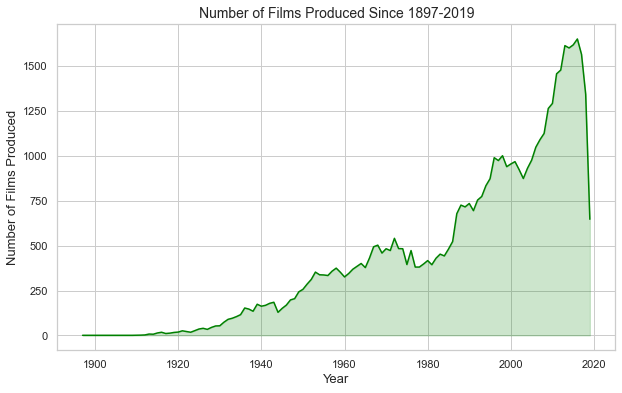

In [154]:
movie_year = film_df[film_df.year != -1]['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.title('Number of Films Produced Since 1897-2019', fontsize=14)
plt.ylabel('Number of Films Produced', fontsize=13)
plt.xlabel('Year', fontsize=13)

sns.lineplot(x=movie_year.index, y=movie_year.values,  color='green')
plt.fill_between(movie_year.index, movie_year.values, alpha=0.2, color='green')
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We see that in the span of over 100 years since filming came to light, the production of films/movies is still continuously growing. 
<pre>


### What are the most popular genres of film in every era?

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
<strong>Note:</strong> 

To clarify, we only assume that the number of films produced in a certain genre is attributed to being popular or unpopular.   

Due to the multitude number of genres, it is better to show the ones that are the most and least produced at that time.
<pre>


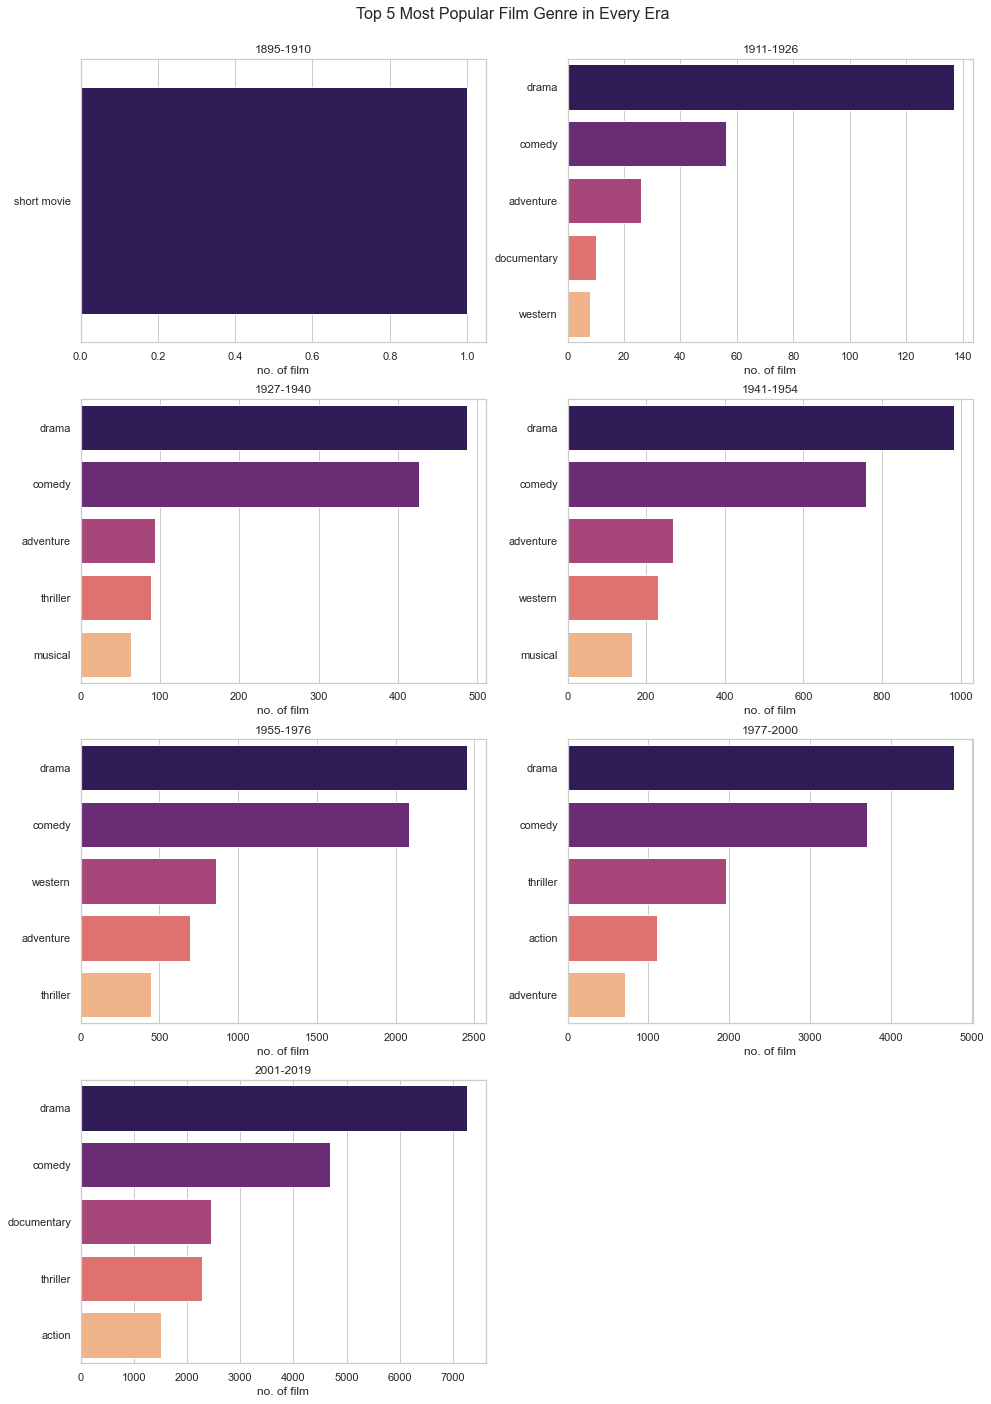

In [165]:
era_labels = ['1895-1910', '1911-1926', '1927-1940', '1941-1954', '1955-1976', '1977-2000', '2001-2019']

fig, axes = plt.subplots(4,2, figsize=(16, 24))

row = column = 0
for era in era_labels:
    data = film_df[(film_df.era == era) & (film_df.genre != 'unknown') & (film_df.year != -1)].genre.value_counts()[:5]
    
    if column < 2:
        sns.barplot(ax=axes[row, column], x=data.values, y=data.index, palette=sns.color_palette("magma", 5))
        
        axes[row, column].set_xlabel('no. of film')
        axes[row, column].title.set_text(f"{era}")
        column+= 1
    
    if column ==2:
        column = 0
        row += 1
        
fig.suptitle('Top 5 Most Popular Film Genre in Every Era', fontsize=16, y=0.91)
axes[row, column].set_visible(False)  # empty subplot
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
For over 100 years, the genres drama, and comedy are still popular today. These two genres remained in the spot of number 1 and 2 respectively.

We also notice the genre documentary became popular in 1911-1926 and only to come back in 2001-2019. 
<pre>


### What are the least popular genres of film in every era?

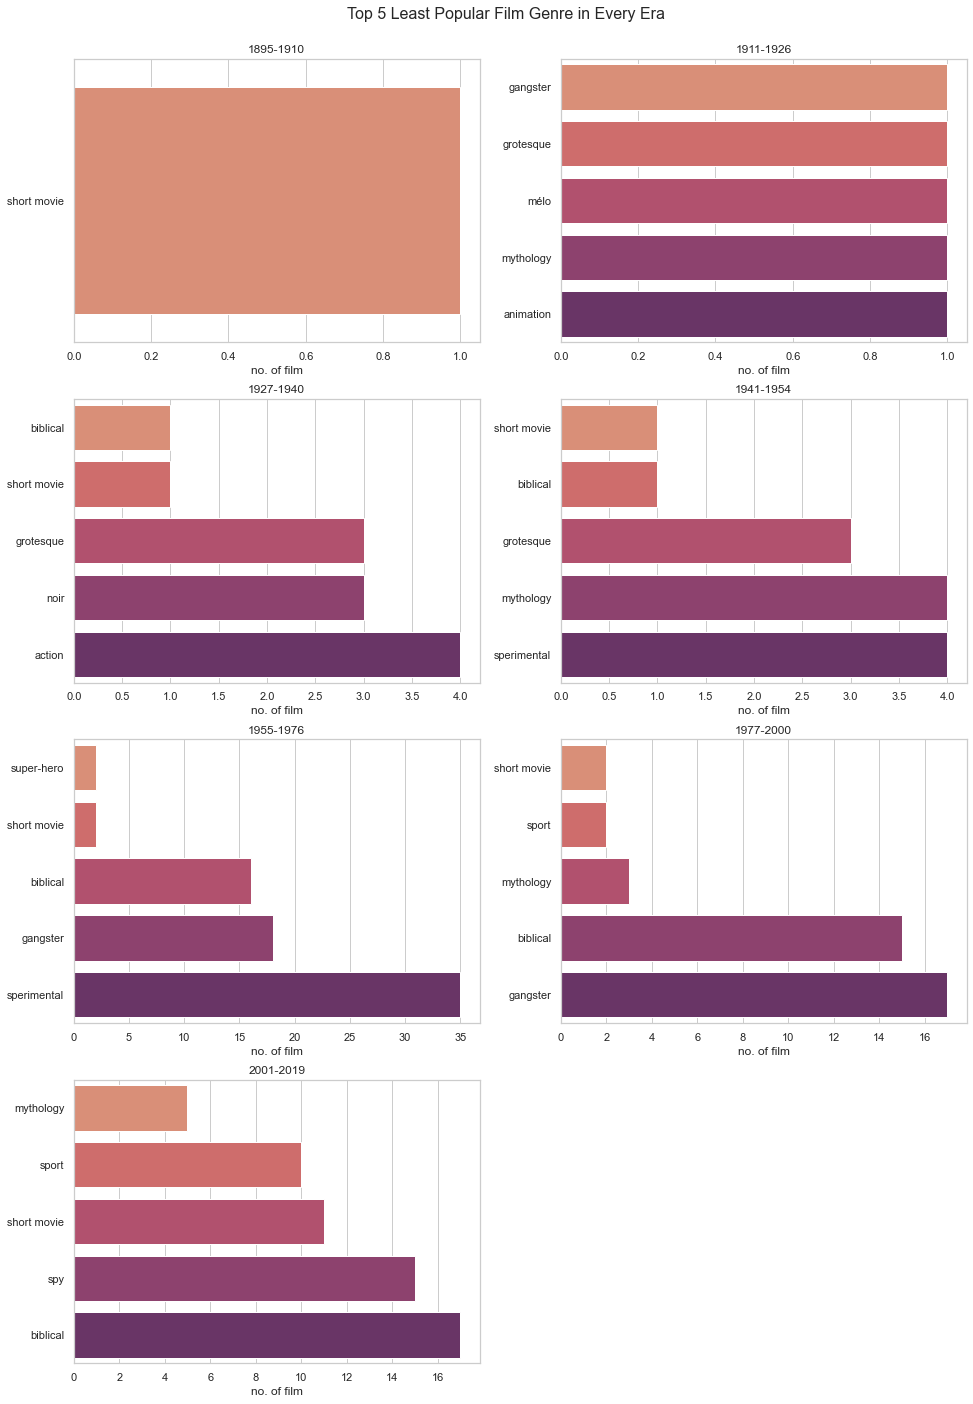

In [22]:
era_labels = ['1895-1910', '1911-1926', '1927-1940', '1941-1954', '1955-1976', '1977-2000', '2001-2019']

fig, axes = plt.subplots(4,2, figsize=(16, 24))

row = column = 0
for era in era_labels:
    data = film_df[(film_df.era == era) & (film_df.genre != 'unknown') & (film_df.year != -1)].genre.value_counts(ascending=True)[:5]
    
    if column < 2:
        sns.barplot(ax=axes[row, column], x=data.values, y=data.index, palette=sns.color_palette("flare", 5))
        
        axes[row, column].set_xlabel('no. of film')
        axes[row, column].title.set_text(f"{era}", )
        column+= 1
    
    if column ==2:
        column = 0
        row += 1
        
fig.suptitle('Top 5 Least Popular Film Genre in Every Era', fontsize=16, y=0.91)
axes[row, column].set_visible(False)  # empty subplot
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
It is not all the time that the genres biblical and mythology becomes one of the least popular genres in a certain era. However, they appear as one of the unpopular genres of all time.  

We can also observe that sport has become one of the unpopular genres lately.
<pre>


### What is the average film playtime length/duration in every era?

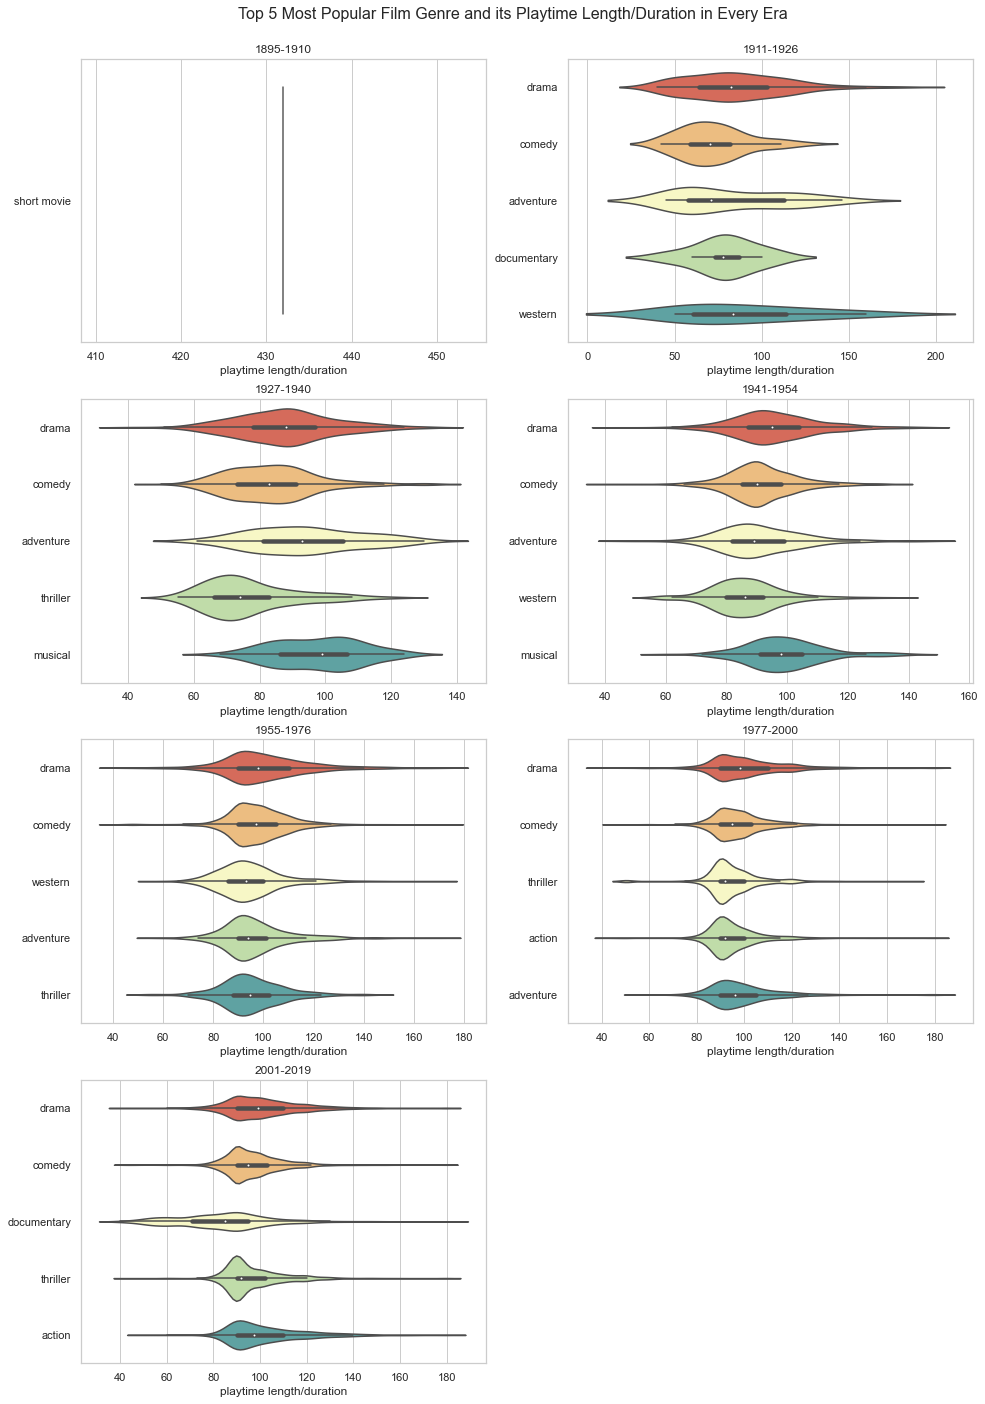

In [169]:
era_labels = ['1895-1910', '1911-1926', '1927-1940', '1941-1954', '1955-1976', '1977-2000', '2001-2019']

fig, axes = plt.subplots(4,2, figsize=(16, 24))

row = column = 0
for era in era_labels:
    conditions = (film_df.era == era) & (film_df.genre != 'unknown') & (film_df.year != -1)
    index = film_df[conditions].genre.value_counts()[:5].index
    data = film_df[(film_df.genre.isin(index)) & conditions][['genre', 'duration']]
    iqr = data.duration
    data = data[iqr.between(iqr.quantile(0), iqr.quantile(.99))]
    
    if column < 2:
        sns.violinplot(ax=axes[row, column], data=data, y="genre", x="duration", palette=sns.color_palette("Spectral", 5), order=index)
        
        axes[row, column].set_xlabel('playtime length/duration')
        axes[row, column].set_ylabel('')
        axes[row, column].title.set_text(f"{era}")
        column+= 1
    
    if column ==2:
        column = 0
        row += 1
        
fig.suptitle('Top 5 Most Popular Film Genre and its Playtime Length/Duration in Every Era', fontsize=16, y=0.91)
axes[row, column].set_visible(False)  # empty subplot
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We observe that the average playtime duration of genres drama, comedy, adventure, and documentary have gone longer compared over 100 years before. 
<pre>


### What countries produce the most films?

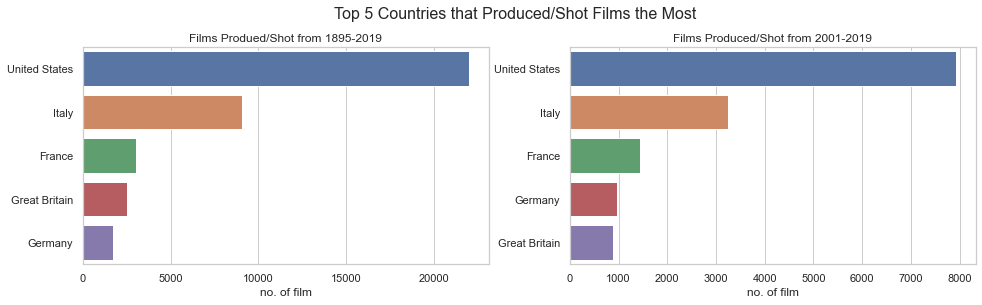

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

condition = sorted(film_df[film_df.country.str.contains(',') == False]['country'].unique().tolist())
data = film_df[film_df.country.isin(condition)].country.value_counts()[:5]
data.index = data.index.str.title()

sns.barplot(x=data.values, y=data.index, ax=ax[0])
ax[0].set_xlabel('no. of film')
ax[0].title.set_text("Films Produed/Shot from 1895-2019")

condition = sorted(film_df[(film_df.country.str.contains(',') == False)]['country'].unique().tolist())
data = film_df[(film_df.country.isin(condition)) & (film_df.era == '2001-2019')].country.value_counts()[:5]
data.index = data.index.str.title()

sns.barplot(x=data.values, y=data.index, ax=ax[1])
ax[1].set_xlabel('no. of film')
ax[1].title.set_text("Films Produced/Shot from 2001-2019")

fig.suptitle('Top 5 Countries that Produced/Shot Films the Most', fontsize=16, y=1.02)
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
We notice that the countries that produced the most films this 2001-2019 are also the countries that produced the most films of all time.  
<pre>


### What genres of film does these top film producing countries make in 2001-2019? 

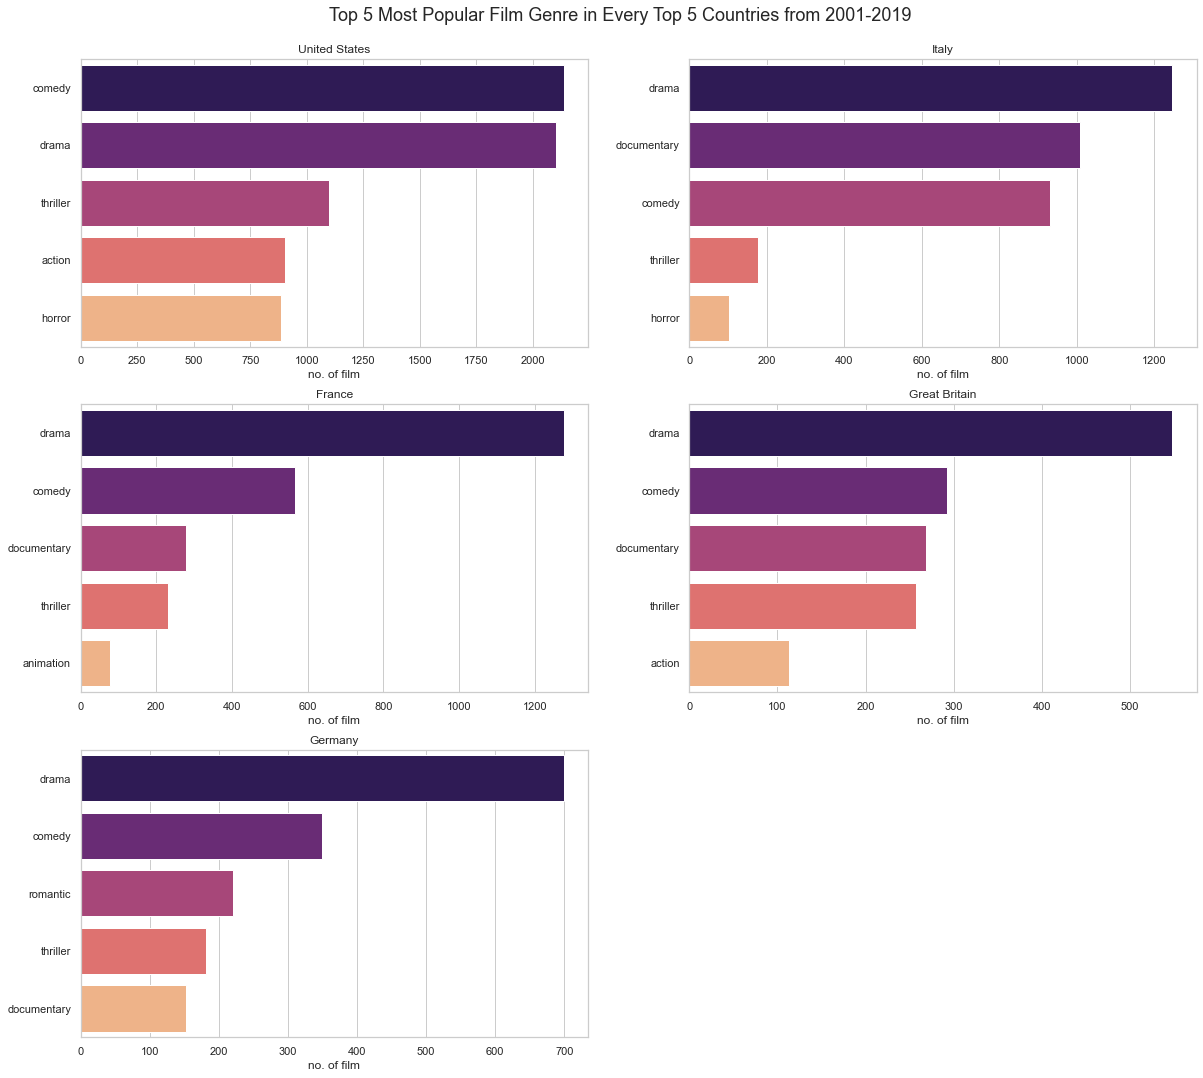

In [25]:
top_countries = ['united states', 'italy', 'france', 'great britain', 'germany']

fig, axes = plt.subplots(3,2, figsize=(20, 18))

row = column = 0
for top_c in top_countries:
    data = film_df[(film_df.country.str.contains(top_c)) & (film_df.genre != 'unknown') & (film_df.era == '2001-2019')].genre.value_counts()[:5]
    
    if column < 2:
        sns.barplot(ax=axes[row, column], x=data.values, y=data.index, palette=sns.color_palette("magma", 5))
        
        axes[row, column].set_xlabel('no. of film')
        axes[row, column].title.set_text(f"{top_c.title()}")
        column+= 1
    
    if column ==2:
        column = 0
        row += 1
        
fig.suptitle('Top 5 Most Popular Film Genre in Every Top 5 Countries from 2001-2019', fontsize=18, y=0.92)
axes[row, column].set_visible(False)  # empty subplot
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
It is worth noting that four of the five top film genres of 2001-2019 are visible in all of the top film producing countries.  
<pre>


### What are the popular and unpopular film genres in the Philippines from 2001-2019? 

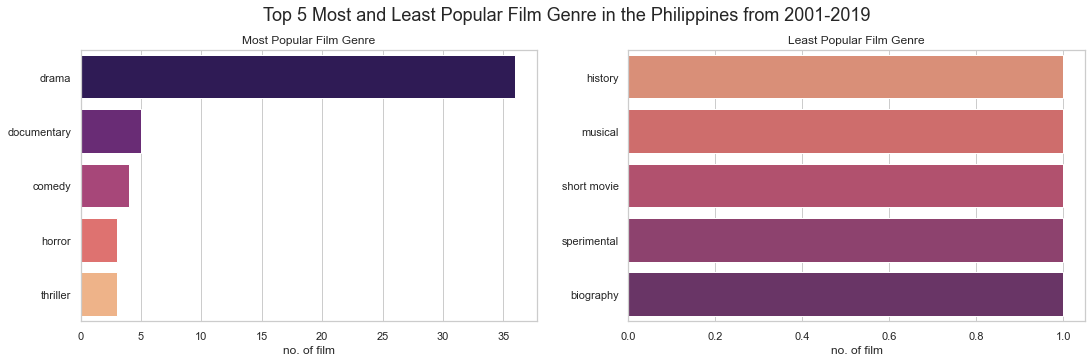

In [26]:
fig, ax = plt.subplots(1,2, figsize=(18, 5))

ph = 'philippines'

data = film_df[(film_df.country.str.contains(ph)) & (film_df.genre != 'unknown') & (film_df.era == '2001-2019')].genre.value_counts()[:5]
sns.barplot(x=data.values, y=data.index, ax=ax[0], palette=sns.color_palette("magma", 5))
ax[0].set_xlabel('no. of film')
ax[0].title.set_text("Most Popular Film Genre")

data = film_df[(film_df.country.str.contains('philippines')) & (film_df.genre != 'unknown') & (film_df.era == '2001-2019')].genre.value_counts(ascending=True)[:5]
sns.barplot(x=data.values, y=data.index, ax=ax[1], palette=sns.color_palette("flare", 5))
ax[1].set_xlabel('no. of film')
ax[1].title.set_text("Least Popular Film Genre")


fig.suptitle('Top 5 Most and Least Popular Film Genre in the Philippines from 2001-2019', fontsize=18, y=1)
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
It is surprising to see that four of the top film genres in 2001-2019 globally is also the top film genres here in the Philippines. On the other hand, out of the least popular genres globally, only the genre short movie is what Philippines have in common.
<pre>

### What is the average film playtime length/duration in the Philippines from 2001-2019?

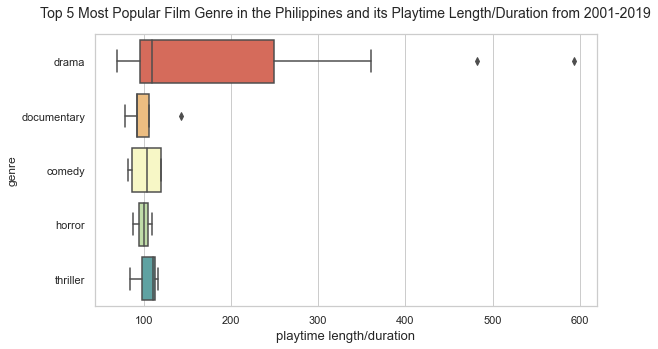

In [175]:
plt.figure(figsize=(9,5))
ph = 'philippines'

conditions = (film_df.era == '2001-2019') & (film_df.genre != 'unknown') & (film_df.year != -1) & (film_df.country.str.contains(ph))
index = film_df[conditions].genre.value_counts()[:5].index
data = film_df[(film_df.genre.isin(index)) & conditions][['genre', 'duration']]
    
sns.boxplot(data=data, y="genre", x="duration", palette=sns.color_palette("Spectral", 5), order=index)
        
plt.title('Top 5 Most Popular Film Genre in the Philippines and its Playtime Length/Duration from 2001-2019', fontsize=14, y=1.04)
plt.xlabel('playtime length/duration', fontsize=13)
        
plt.show()


<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
All of the top film genres in the Philippines have an average of over 100 minutes.This is longer compared to all of the average top film genres globally.
<pre>

### Is there a relationship between the duration of a film playtime and its average vote score?

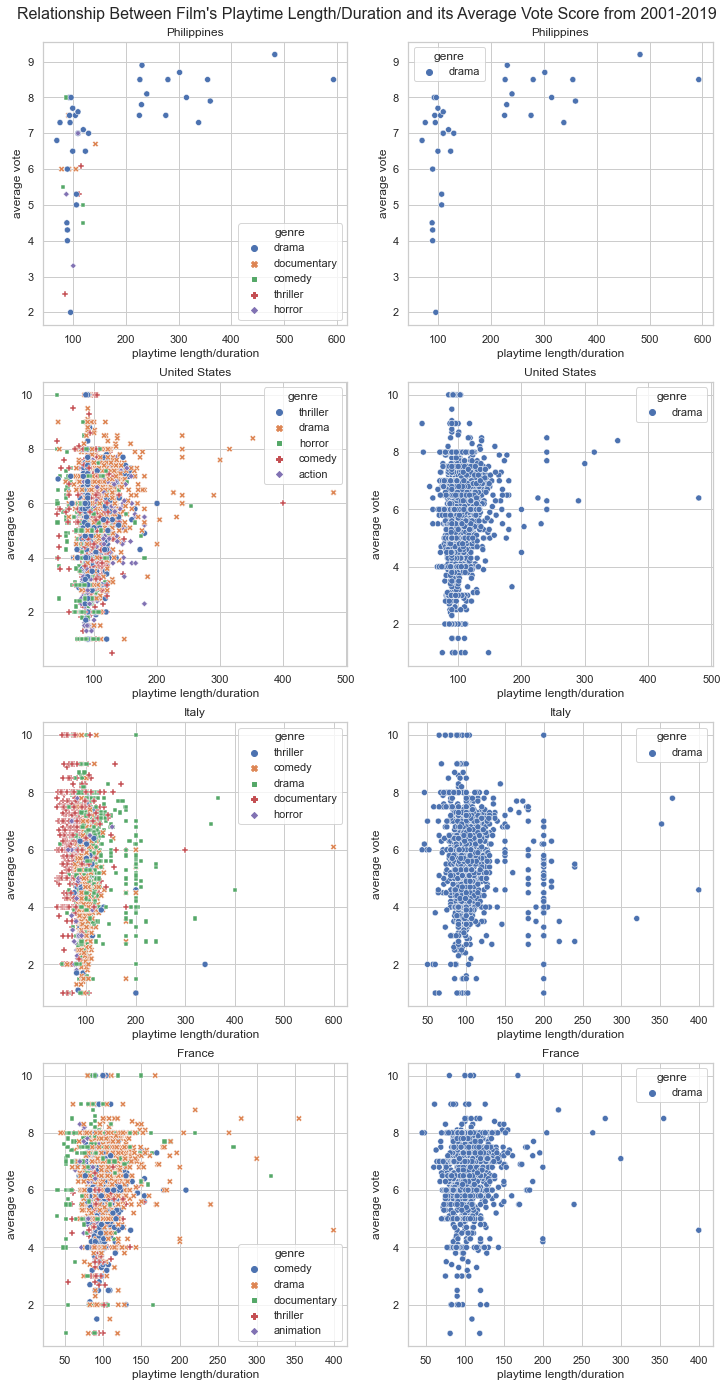

In [176]:
sample_countries = ['philippines', 'united states', 'italy', 'france']

fig, axes = plt.subplots(4,2, figsize=(12, 24))

row = column = 0
for samp_c in sample_countries:
    conditions = (film_df.era == '2001-2019') & (film_df.genre != 'unknown') & (film_df.year != -1) & (film_df.country.str.contains(samp_c))
    index = film_df[conditions].genre.value_counts()[:5].index
    data = film_df[(film_df.genre.isin(index)) & conditions][['avg_vote', 'duration', 'genre']]
    
    if column < 2:
        sns.scatterplot(ax=axes[row, column], data=data, x="duration", y="avg_vote", hue="genre", style="genre")
        
        axes[row, column].set_xlabel('playtime length/duration')
        axes[row, column].set_ylabel('average vote')
        axes[row, column].title.set_text(f"{samp_c.title()}")
        column+= 1
        
        data = data[(data.genre=='drama')]
        sns.scatterplot(ax=axes[row, column], data=data, x="duration", y="avg_vote", hue="genre", style="genre")
        
        axes[row, column].set_xlabel('playtime length/duration')
        axes[row, column].set_ylabel('average vote')
        axes[row, column].title.set_text(f"{samp_c.title()}")
        column+= 1
    
    if column ==2:
        column = 0
        row += 1
        
fig.suptitle("Relationship Between Film's Playtime Length/Duration and its Average Vote Score from 2001-2019", fontsize=16, y=0.9)
plt.show()

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
Here we see that there is a moderately positive linear association of top film genres' playtime length/duration to the  average vote score especially the drama genre in the Philippines. However, due to lack of recorded data in country Philippines, we see that there is actually no correlation of top film genres' playtime length/duration to the average vote score.
<pre>

<pre style="text-align: justify; border: 0.2em solid; padding: 1em;">
<strong>What is the current context of the organization / industry being studied?</strong>

1. Popular and Unpopular film genres globally and in the Phillipines. 
2. Average film playtime length/duration of top popular film genres. 
3. Correlation of film playtime length/duration to average vote score.


<strong>How is a data-driven solution helpful for the organization / industry being studied?</strong>

Data-driven solution provides a much more holistic answer in a problem. Since it is based on historical data, data-driven solutions can provide a better way of understanding the past and predicting the future. This gives an understanding on what film genres were popular at the past and gives a more accurate assumption on what film genres might be popular in the future.       

<strong>What is your initial hypothesis regarding the organization / industry</strong>

1. Romance genre belongs to one of the top 5 popular film genres in 2001-2019 if not all time. 
2. The United States of America and France belongs to one of the most film producing countries of all time. 
3. Films have an average of 1 hour and 30 minutes of playtime length/duration.

<strong>What are the data processing and / or data cleaning that your team did in order to arrive at your visualizations?</strong>

1. Dropped columns that we think are unnecessary.
2. Filled null values with -1 for integer and 'unknown' for object.
3. Stripped leading and trailing whitespaces and newlines in object values.
4. Converted object values into lowercase. 
5. Binned/Grouped years into eras.

<strong>After performing EDA, what do you think is the key insight that you have mined from the dataset? How is this insight helpful to the target organization?</strong>

1. Drama and Comedy are the top 1 and top 2 genres of most film produced since 1895.
2. Most popular genres of film have now longer playtime length/duration. 

I assume that genres that are mostly produced are considered as popular since film industries would likely to produce those type of films if there are a lot of viewers who wanted to watch those kind of things. This also gives target film industries a recommendation of what genres of movies are likely to be watched by many viewers assuming that these mostly produced type of genres are popular. Although there is no correlation between the films playtime length and its average vote score, it is still recommended to have a film that corresponds to the average film playtime length based on genre. 


<strong>From your visualizations what would you recommend the organization / industry to do?</strong>

1. If an industry does not know what type of film to produce then I would suggest they should either produce a drama, comedy, documentary, thriller, or action type of film right now.
2. I would not reccommend them to produce mythology, sport, short movie, spy, or biblical type of film right now unless they don't mind having lesser chance of having high count of viewers. 
3. I recommend they produce films that fall under the interquartile range or average film playtime length/duration based on the genre they have picked. However, it is not bad to produce films that have lesser or more time compared to the average playtime length.
<pre>